### Импорт библиотек

In [64]:
import numpy as np
import pandas
import matplotlib.pyplot as plt
import seaborn as sns

import torch
import torch.nn as nn

### Краткая теоретическая часть

Глубокое обучение - обучение функции, представляющей композицию множества нелинейных преобразований. Такая сложная функция назвается потоком или графом вычислений. Фреймворк глубокого обучения должен уметь делать три вещи:
- Определять граф вычислений
- Дифференцировать граф вычислений
- Вычислять граф вычислений  

![Без имени.png](<attachment:Без имени.png>)

Зеленый: forward pass  
Красный: bacward pass
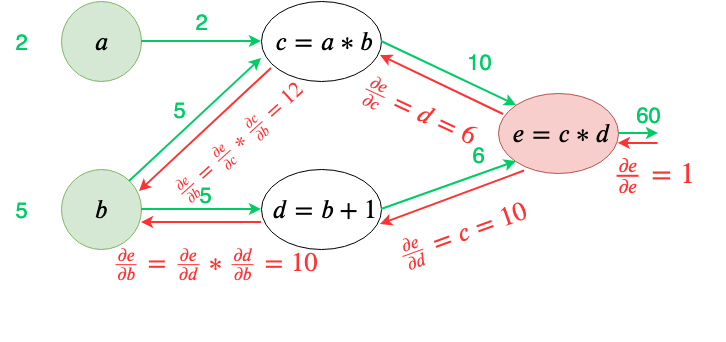

### Тензоры
Тип данных, хранимых тензором, отражается в имени его конструктора. Контсруктор без параметров вернёт специальное значение - тензор без размерности, который нельзя использовать ни в каких операциях.

In [65]:
torch.tensor([])

tensor([])

In [66]:
torch.HalfTensor  # 16 бит, с плавающей запятой
torch.FloatTensor  # 32 бита, с плавающей точкой
torch.DoubleTensor  # 64 бита, с плавающей точкой

torch.ShortTensor  # 16 бит, целочисленный, знаковый
torch.IntTensor  # 32 бита, целочисленный, знаковый
torch.LongTensor  # 64 бита, целочесленный, знаковый

torch.CharTensor  # 8 бит, целочисленный, знаковый
torch.ByteTensor  # 8 бит, целочисленный, беззнаковый
pass

In [67]:
tensor = torch.IntTensor([1])
print(tensor.byte())
print(tensor.float())

tensor([1], dtype=torch.uint8)
tensor([1.])


In [68]:
tensor = torch.IntTensor([[1, 2], [3, 4]])
tensor

tensor([[1, 2],
        [3, 4]], dtype=torch.int32)

In [69]:
# Указание только формы тензора
print(torch.FloatTensor(1))
print()
print(torch.FloatTensor(3, 3))

tensor([-2.5596e+18])

tensor([[-1.2390e-02,  4.5562e-41, -1.2390e-02],
        [ 4.5562e-41,  0.0000e+00,  1.3572e+07],
        [ 1.8077e-43,  0.0000e+00, -1.0290e-02]])


In [70]:
# Индексирование
print("Исходный тензор:\n", tensor)
print("Индексация:")
print(tensor[0])
print(tensor[0][0])
print(tensor[0, 0])
print(tensor[:, 0])
print(tensor[0, 1:2])

Исходный тензор:
 tensor([[1, 2],
        [3, 4]], dtype=torch.int32)
Индексация:
tensor([1, 2], dtype=torch.int32)
tensor(1, dtype=torch.int32)
tensor(1, dtype=torch.int32)
tensor([1, 3], dtype=torch.int32)
tensor([2], dtype=torch.int32)


In [71]:
# Инициализация случайными значениями
g_cpu = torch.Generator()
g_cpu.manual_seed(42)
tensor = torch.ByteTensor(3, 4).random_(generator=g_cpu)
tensor

tensor([[102, 179,  92,  14],
        [106,  71, 188,  20],
        [102, 121, 210, 214]], dtype=torch.uint8)

In [72]:
print(tensor[:2])
print()
# Также меняем тип данных
print(tensor[torch.LongTensor([0, 2])])

tensor([[102, 179,  92,  14],
        [106,  71, 188,  20]], dtype=torch.uint8)

tensor([[102, 179,  92,  14],
        [102, 121, 210, 214]], dtype=torch.uint8)


In [73]:
# Выборка по условию
tensor[tensor > 128]

tensor([179, 188, 210, 214], dtype=torch.uint8)

In [74]:
# Информация про тензор
print(tensor.dim())
print(tensor.size())
print(tensor.type())
print(tensor.data_ptr())

2
torch.Size([3, 4])
torch.ByteTensor
94720072247680


### Операции над тензорами
Функция вида func в PyTorch возвращает новый тензор (immutable функция). В противоположность func_ изменяет изначальный тензор (mutalbe/inplace функция). Существуют функции исключения, которые имеют только один тип, например, функция изменяющая размер (immutable)  

![Без имени.png](<attachment:Без имени.png>)
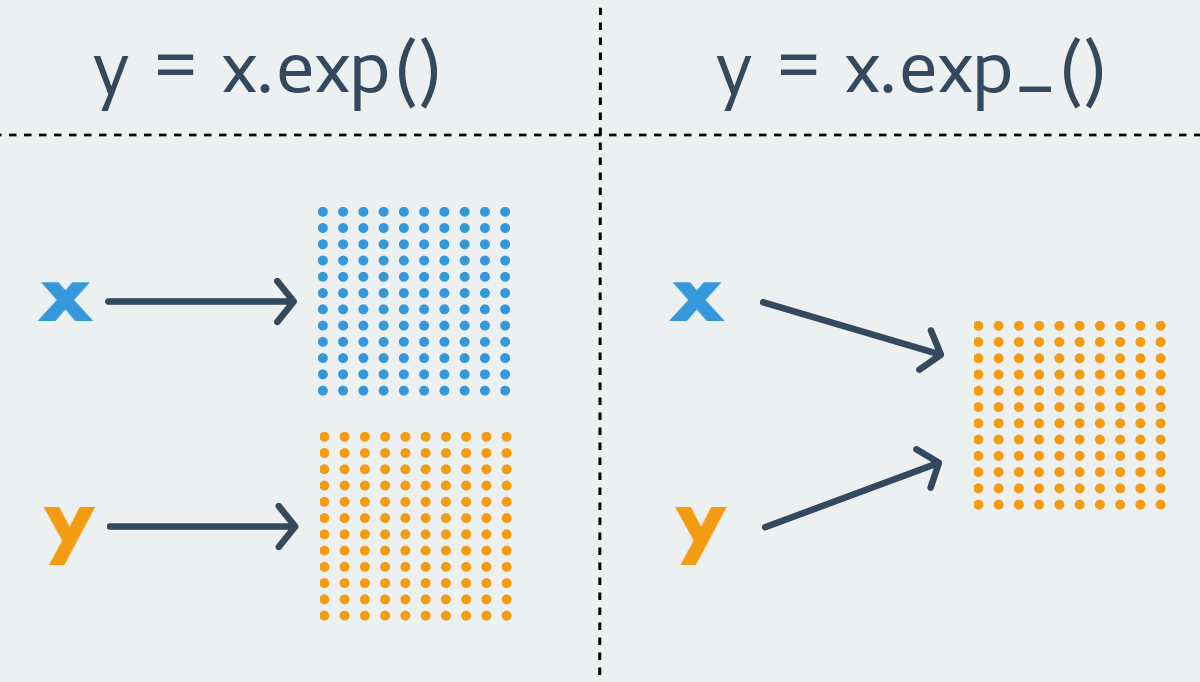

In [103]:
# Заполнение мусорного тензора
tensor = torch.FloatTensor(3, 3)
print(tensor.zero_())
print(tensor.fill_(1))

g_cpu.manual_seed(42)
print(tensor.random_(0, 100, generator=g_cpu))

print(tensor.uniform_(0, 1))
print(tensor.normal_(mean=0, std=1, generator=g_cpu))
print(tensor.bernoulli_(p=0.5))

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])
tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])
tensor([[42., 67., 76.],
        [14., 26., 35.],
        [20., 24., 50.]])
tensor([[0.3890, 0.5890, 0.9705],
        [0.5475, 0.7896, 0.8881],
        [0.9037, 0.3273, 0.3882]])
tensor([[ 1.5231,  0.6647, -1.0324],
        [-0.2770, -0.1671, -0.1079],
        [-1.4285, -0.2810,  0.7489]])
tensor([[1., 1., 1.],
        [0., 1., 0.],
        [0., 1., 0.]])


In [116]:
# Математические операции
g_cpu.manual_seed(42)
tensor_a = torch.FloatTensor(tensor)
tensor_b = torch.FloatTensor(3, 3).random_(0, 100, generator=g_cpu)

tensor_sum = tensor_a.add(tensor_b)
tensor_sub = tensor_a.sub(tensor_b)
tensor_mul = tensor_a.mul(tensor_b)
tensor_div = tensor_a.div(tensor_b)
tensor_exp = tensor_a.exp()
tensor_log = tensor_a.log()  # Натуральный логарифм
tensor_plus_one = tensor_a + 1
tensor_log1p = tensor_a.log1p()  # Натуральный логарифм от tensor + 1
tensor_abs = tensor_a.abs()

print("Исходный тензор:\n", tensor)
print("Применение математических операций:")
print(tensor_sum)
print(tensor_sub)
print(tensor_mul)
print(tensor_div)
print(tensor_mul)
print(tensor_exp)
print(tensor_log)
print(tensor_plus_one)
print(tensor_log1p)
print(tensor_abs)


Исходный тензор:
 tensor([[1., 1., 1.],
        [0., 1., 0.],
        [0., 1., 0.]])
Применение математических операций:
tensor([[43., 68., 77.],
        [14., 27., 35.],
        [20., 25., 50.]])
tensor([[-41., -66., -75.],
        [-14., -25., -35.],
        [-20., -23., -50.]])
tensor([[42., 67., 76.],
        [ 0., 26.,  0.],
        [ 0., 24.,  0.]])
tensor([[0.0238, 0.0149, 0.0132],
        [0.0000, 0.0385, 0.0000],
        [0.0000, 0.0417, 0.0000]])
tensor([[42., 67., 76.],
        [ 0., 26.,  0.],
        [ 0., 24.,  0.]])
tensor([[2.7183, 2.7183, 2.7183],
        [1.0000, 2.7183, 1.0000],
        [1.0000, 2.7183, 1.0000]])
tensor([[0., 0., 0.],
        [-inf, 0., -inf],
        [-inf, 0., -inf]])
tensor([[2., 2., 2.],
        [1., 2., 1.],
        [1., 2., 1.]])
tensor([[0.6931, 0.6931, 0.6931],
        [0.0000, 0.6931, 0.0000],
        [0.0000, 0.6931, 0.0000]])
tensor([[1., 1., 1.],
        [0., 1., 0.],
        [0., 1., 0.]])


In [121]:
# Векторные и матричные операции
tensor_c = torch.FloatTensor([1, 2 ,3])
tensor_d = torch.FloatTensor([4, 5, 6])

tensor_transpose = tensor_a.t()
tensor_mm = tensor_a.mm(tensor_b)  # matrix matrix
tensor_dot = torch.dot(tensor_c, tensor_d)  
tensor_mv = tensor_a.mv(tensor_c)  # matrix vector

print(tensor_transpose)
print(tensor_mm)
print(tensor_dot)
print(tensor_mv)

tensor([[1., 0., 0.],
        [1., 1., 1.],
        [1., 0., 0.]])
tensor([[ 76., 117., 161.],
        [ 14.,  26.,  35.],
        [ 14.,  26.,  35.]])
tensor(32.)
tensor([6., 2., 2.])


In [123]:
# Умножение батчами
g_cpu.manual_seed(42)
batch_tensor_a = torch.randn(10, 3, 4, generator=g_cpu)  # 10 батчей 3 x 4
batch_tensor_b = torch.randn(10, 4, 5, generator=g_cpu)

batch_tensor_result = torch.bmm(batch_tensor_a,
                                batch_tensor_b)
batch_tensor_result.size()

torch.Size([10, 3, 5])

In [131]:
# Выборочное среднее, стандартное отклонение, дисперсия
# Медиана, сумма, произведение, максимум, минимум
tensor_mean = torch.mean(tensor)
tensor_std = torch.std(tensor)
tensor_var = torch.var(tensor)
tensor_median = torch.median(tensor)
tensor_sum = torch.sum(tensor)
tensor_prod = torch.prod(tensor)
tensor_max = torch.max(tensor)
tensor_min = torch.min(tensor)

print("Исходный тензор:\n", tensor)
print(tensor_mean)
print(tensor_std)
print(tensor_var)
print(tensor_median)
print(tensor_sum)
print(tensor_prod)
print(tensor_max)
print(tensor_min)



Исходный тензор:
 tensor([[1., 1., 1.],
        [0., 1., 0.],
        [0., 1., 0.]])
tensor(0.5556)
tensor(0.5270)
tensor(0.2778)
tensor(1.)
tensor(5.)
tensor(0.)
tensor(1.)
tensor(0.)


In [132]:
# Операции сравнения (eq, ne, gt, lt, ge, le => ByteTensor)
# Операторы +, +=, -, -=, *, *=, /, /=, @
# Сортировка, поэлементное применение функций
# Конвертация с numpy: torch.from_numpy(...), tensor.numpy()

In [133]:
# Пример линейного слоя с функцией активации softmax
def LinearSoftmax(x, w, b):
    s = x.mm(w).add_(b)
    s.exp_()
    s.div_(s.sum(1))

    return s